# **PENERAPAN METODE *K-MEANS CLUSTERING* UNTUK SEGMENTASI PELANGGAN PADA PLATFORM BELANJA ONLINE X MENGGUNAKAN GOOGLE COLAB** 

## **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
from scipy import stats 
from sklearn.preprocessing import StandardScaler

## **Data Preparation**

In [ ]:
from google.colab import files
uploades = files.upload()

Saving Shopping_CustomerData1.csv to Shopping_CustomerData1.csv


In [ ]:
data = pd.read_csv("Shopping_CustomerData1.csv")
data.head()

,Customer ID,Customer Gender,Customer Age,Annual Income,Spending Score
0,1001,Male,49,52.755,78
1,1002,Male,59,20.714,63
2,1003,Female,54,16.442,69
3,1004,Female,42,5.622,30
4,1005,Female,30,25.619,6


In [ ]:
#Statistika Deskriptif
data.describe()

,Customer ID,Customer Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.00000
mean,1100.500000,45.520000,28.514390,50.70500
std,57.879185,16.113592,16.922918,28.72269
min,1001.000000,18.000000,0.258000,2.00000
25%,1050.750000,31.750000,15.322750,27.75000
50%,1100.500000,46.500000,26.342000,48.00000
75%,1150.250000,59.000000,38.485750,77.00000
max,1200.000000,75.000000,69.541000,100.00000


In [ ]:
#Menslicing data yang akan di analisis
df_new = data[['Annual Income','Spending Score']] 
df_new.head

<bound method NDFrame.head of      Annual Income  Spending Score
0           52.755              78
1           20.714              63
2           16.442              69
3            5.622              30
4           25.619               6
..             ...             ...
195         31.747              52
196         32.331              58
197         10.906              36
198         16.012              24
199         28.008              31

[200 rows x 2 columns]>

In [ ]:
df_new.describe()

,Annual Income,Spending Score
count,200.000000,200.00000
mean,28.514390,50.70500
std,16.922918,28.72269
min,0.258000,2.00000
25%,15.322750,27.75000
50%,26.342000,48.00000
75%,38.485750,77.00000
max,69.541000,100.00000


In [ ]:
#Memeriksa apakah ada data yang hilang (NULL)
df_new.isnull().sum() 

Annual Income     0
Spending Score    0
dtype: int64

## **Data Visualization**

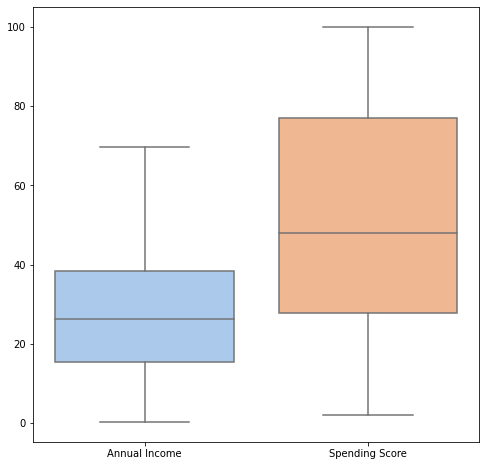

In [ ]:
#Biplot
fig, ax = plt.subplots(figsize=(8,8))

warna = sns.color_palette('pastel')
sns.boxplot(data=df_new, palette=(warna))

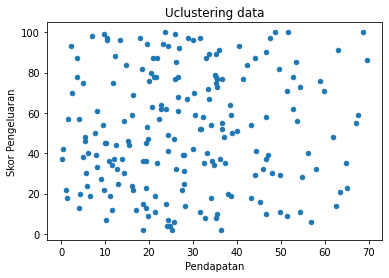

In [ ]:
#Scatter Plot
data.plot(kind='scatter', x='Annual Income', y='Spending Score')
#plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1])
plt.xlabel('Pendapatan')
plt.ylabel('Skor Pengeluaran')
plt.title ('Uclustering data')
plt.show()

## **K-MEANS CLUSTERING**

Tahap Awal Penerapan K-Means Clustering.
berikut adalah tahapannya :
1. Mengansumsikan nilai K
2. Menentukan Random Centroid
3. Menentukan Random Seed. kita ambil contoh 40

In [ ]:
#Step-1
k = 3 #Asumsikan nilai K adalah 3
np.random.seed(40)

#Menentukan 3 titik random sebagai Centroid 
random_centroids=[]
for i in range(1,k+1):
  random_centroids.append([np.random.randint(1,100), np.random.randint(1,100)])#Here, we have selecting the random values between 1 and 100 because most of of our values lie in this range
print('Randomly selected points as random_centroids:',random_centroids)

Randomly selected points as random_centroids: [[71, 92], [8, 38], [57, 51]]


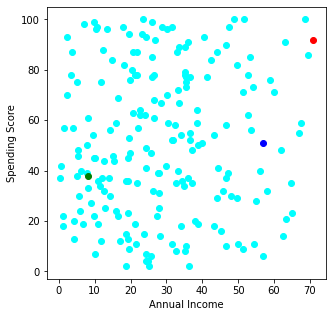

In [ ]:
#Memplotting Random Centroid yang telah ditentukan sebelumnya
plt.figure(figsize=(5, 5))
plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1], color='cyan')
length = len(random_centroids)
colors1=['r','g','b','black','yellow','cyan']
for i in range(length):
  plt.scatter(*random_centroids[i],color=colors1[i])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [ ]:
#Langkah kedua

#Here, we are calculating the distance between the datapoints and our centroids and assigning each data-point to the closest cluster
def assignment(df_new,random_centroids):

  for i in range(length) :
    df_new['Distance from Centroid {}'.format(i)]=(np.sqrt((df_new.iloc[:,0] - random_centroids[i][0]) ** 2 + (df_new.iloc[:,1] - random_centroids[i][1]) ** 2))
   
  list1=[]
  list2=[]
  for a,b,c in zip(df_new['Distance from Centroid 0'],df_new['Distance from Centroid 1'],df_new['Distance from Centroid 2']):
    d = min(a,b,c)
   
    if d == a:
      list1.append(0)
      list2.append('r')
    elif d == b:
      list1.append(1)
      list2.append('g')
    else:
      list1.append(2)
      list2.append('b')
  df_new['Closest_Centroid'] = list1
  df_new['Color']=list2
  return df_new 

In [ ]:
df_new = assignment(df_new, random_centroids)
df_new.head()

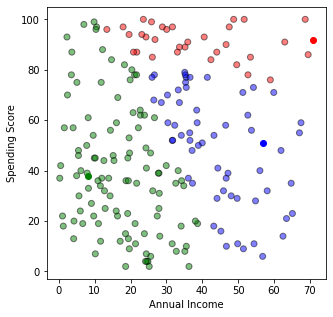

In [ ]:
#Penempatan Cluster
plt.figure(figsize=(5,5))
plt.scatter(df_new.iloc[:,0],df_new.iloc[:,1],color =df_new['Color'],alpha = 0.5,edgecolor = 'k')
for i in range(length):
  plt.scatter(*random_centroids[i],color=colors1[i])
  plt.xlabel('Annual Income')
  plt.ylabel('Spending Score')

In [ ]:
#Step-3

#Update Stage
#In this satge, we are updating the centroids of the newly formed clusters
def update(parameter):
    for i in range(length):
        random_centroids[i][0] = np.mean(df_new[df_new['Closest_Centroid'] == i]['Annual Income'])
        random_centroids[i][1] = np.mean(df_new[df_new['Closest_Centroid'] == i]['Spending Score'])
    return parameter

In [ ]:
random_centroids = update(random_centroids)
random_centroids

[[37.79846875, 91.21875],
 [17.214045871559634, 39.84403669724771],
 [44.35586440677967, 48.79661016949152]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

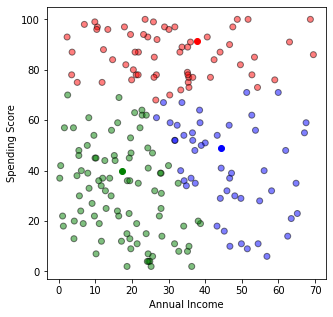

In [ ]:
#Repeat Assignment Step
#Here, we are again calculating the distance between the datapoints and our centroids and assigning each data-point to the closest cluster
df_new = assignment(df_new, random_centroids)  
df_new.head()
plt.figure(figsize=(5, 5))
plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1], color=df_new['Color'], alpha=0.5, edgecolor='k')
for i in range(length):
  plt.scatter(*random_centroids[i], color=colors1[i])
  plt.xlabel('Annual Income')
  plt.ylabel('Spending Score')
plt.show()

In [ ]:
#Step-4

#In this step, we are going to keep repeating the update centroid and the assignment stage until the centroids stop changing i.e. No New Clusters being formed.
count=1
while True:
  old_random_centroids = np.round(random_centroids)
  print('Old Centroid',old_random_centroids)
  count+=1
  random_centroids = update(random_centroids)
  
  new_random_centroids = np.round(random_centroids)
  print('New Centroid',new_random_centroids)

  df_new = assignment(df_new, random_centroids)
  result=np.allclose(old_random_centroids,new_random_centroids)#np.allclose() function checks if two arrays are equal element-wise
  print(result)
  if result == True:
    break
  
    
print(count)

Old Centroid [[38. 91.]
 [17. 40.]
 [44. 49.]]
New Centroid [[30. 86.]
 [17. 32.]
 [46. 42.]]
False
Old Centroid [[30. 86.]
 [17. 32.]
 [46. 42.]]
New Centroid [[30. 83.]
 [17. 29.]
 [46. 38.]]
False
Old Centroid [[30. 83.]
 [17. 29.]
 [46. 38.]]
New Centroid [[30. 82.]
 [17. 28.]
 [46. 37.]]
False
Old Centroid [[30. 82.]
 [17. 28.]
 [46. 37.]]
New Centroid [[30. 81.]
 [17. 28.]
 [46. 36.]]
False
Old Centroid [[30. 81.]
 [17. 28.]
 [46. 36.]]
New Centroid [[30. 81.]
 [17. 28.]
 [46. 36.]]
True
6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

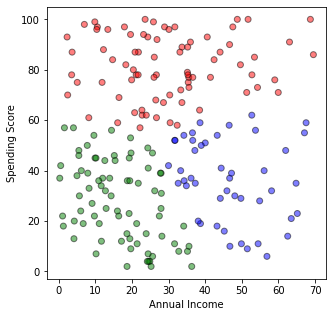

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1], color=df_new['Color'], alpha=0.5, edgecolor='k')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [ ]:
#Here, we will take only two features and top 400 entries of each feature from the dataset just to make it easy to visualize the steps.
df = data[["Annual Income","Spending Score"]]
df.head()

,Annual Income,Spending Score
0,52.755,78
1,20.714,63
2,16.442,69
3,5.622,30
4,25.619,6


In [ ]:
#Here, we are assuming the value of k as 3
kmeans = KMeans(n_clusters=3)#Creating a K-Means Object
kmeans.fit(df)#Fitting the Model

KMeans(n_clusters=3)

In [ ]:
#Here, we are generating Labels of each point
labels = kmeans.predict(df)
labels

array([0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 2, 0, 0, 2, 1, 2, 1, 1, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 2, 0, 1, 2,
       0, 2, 0, 1, 0, 1, 0, 1, 2, 1, 0, 0, 2, 0, 1, 2, 1, 1, 0, 1, 1, 2,
       0, 1, 2, 0, 1, 1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2,
       2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 2, 2, 2, 1, 1, 0, 1, 1, 0, 1, 0,
       2, 0, 1, 2, 0, 2, 2, 2, 0, 2, 0, 0, 1, 0, 2, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 2, 0, 0, 2, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 2, 2, 1, 0, 0, 2,
       0, 2, 1, 0, 1, 0, 0, 1, 2, 1, 0, 2, 1, 2, 0, 1, 2, 1, 0, 1, 0, 1,
       1, 1], dtype=int32)

In [ ]:
df['ClusterID'] = labels
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Annual Income,Spending Score,Cluster ID,ClusterID
0,52.755,78,0,0
1,20.714,63,0,0
2,16.442,69,0,0
3,5.622,30,1,1
4,25.619,6,2,2
...,...,...,...,...
195,31.747,52,1,1
196,32.331,58,0,0
197,10.906,36,1,1
198,16.012,24,1,1


In [ ]:
#printing the centroids of each cluster
centroids = kmeans.cluster_centers_
centroids

array([[32.16755422, 79.79518072],
       [15.81665625, 38.984375  ],
       [38.12650943, 19.30188679]])

In [ ]:
#melihat inersia k-means
kmeans.inertia_

73544.93792679871

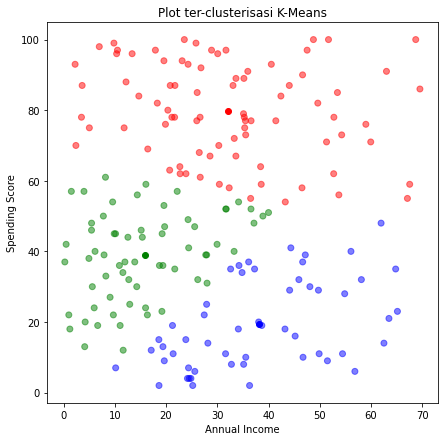

In [ ]:
plt.figure(figsize=(7, 7))
colmap = {1:'r',2:'g',3:'b',4:'y',5:'c'} #penentuan warna plot
colors = map(lambda x: colmap[x+1], labels)
print(colors)
colors1=list(colors)

plt.scatter(data['Annual Income'], df['Spending Score'], color=colors1, alpha=0.5)
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Plot ter-clusterisasi K-Means')
plt.show()

In [ ]:
inertia_list = []
for num_clusters in np.arange(1, 21):
    kmeans =KMeans(n_clusters=num_clusters)
    kmeans.fit(df)
    inertia_list.append(kmeans.inertia_)

In [ ]:
inertia_list

[221295.74303157994,
 98047.0384634909,
 73775.0184611016,
 55415.098253696095,
 41835.64364768543,
 34144.77037790013,
 29545.96845724596,
 26273.315376342816,
 22434.47958385252,
 20543.96165035085,
 18187.559985765685,
 16396.93985337807,
 14951.633932344448,
 13686.988595798015,
 12763.486148249565,
 11856.330956848298,
 10811.236139924964,
 10291.556328406592,
 9421.700609313306,
 8820.348354571179]

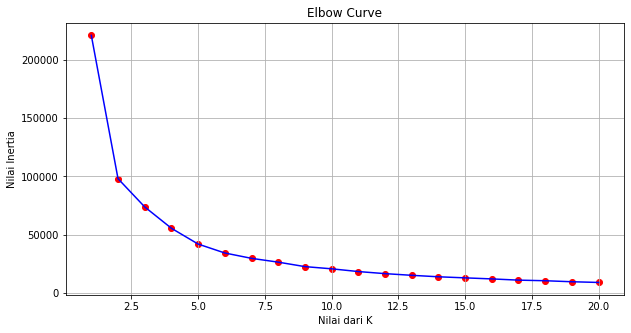

In [ ]:
#Plotting menggunakan elbow curve
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, 21), inertia_list, color='blue')
plt.scatter(np.arange(1, 21), inertia_list, color='red')
plt.grid(True)
plt.xlabel('Nilai dari K')
plt.ylabel('Nilai Inertia')
plt.title('Elbow Curve')
plt.show()